In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv('xtrainCyclodextrin.csv')
dataset_test = pd.read_csv('xtestCyclodextrin.csv')

In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Host                     2940 non-null   object 
 1   CID_Host                 2940 non-null   int64  
 2   Guest                    2940 non-null   object 
 3   CID_Guest                1724 non-null   float64
 4   pH                       2940 non-null   float64
 5   T                        2940 non-null   float64
 6   Erreur                   1724 non-null   float64
 7   K                        2940 non-null   int64  
 8   logK                     1216 non-null   float64
 9   Reference                2940 non-null   object 
 10  Original_Value           2940 non-null   object 
 11  IsomericSMILES           2940 non-null   object 
 12  IsomericSMILES_Host      2940 non-null   object 
 13  TPSA                     2940 non-null   float64
 14  MolecularWeight         

In [4]:
#Having an idea about missing data
dataset_train.isnull().sum()

Host                          0
CID_Host                      0
Guest                         0
CID_Guest                  1216
pH                            0
T                             0
Erreur                     1216
K                             0
logK                       1724
Reference                     0
Original_Value                0
IsomericSMILES                0
IsomericSMILES_Host           0
TPSA                          0
MolecularWeight               0
Complexity                    0
Charge                        0
HBondDonorCount               0
HBondAcceptorCount            0
HeavyAtomCount                0
MolLogP                       0
AromaticProportion            0
TPSA_Host                     0
MolecularWeight_Host          0
Complexity_Host               0
Charge_Host                   0
HBondDonorCount_Host          0
HBondAcceptorCount_Host       0
HeavyAtomCount_Host           0
iso2vec-0                     0
iso2vec-1                     0
iso2vec-

In [5]:
x_train = dataset_train.drop(['Original_Value',"Reference","CID_Guest","Guest","IsomericSMILES_Host","IsomericSMILES"],axis=1)

In [6]:
x_test = dataset_test.drop(['Original_Value',"Reference","CID_Guest","Guest","IsomericSMILES_Host","IsomericSMILES"],axis=1)

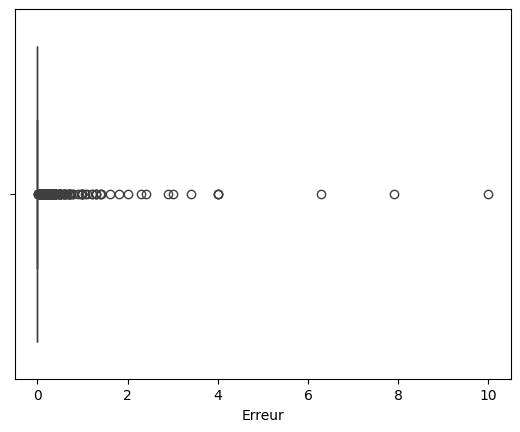

In [7]:
data_Erreur_not_null = x_train[x_train['Erreur'].isnull()==False]
#Check for outliers using boxplot
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
sns.boxplot(data=data_Erreur_not_null, x="Erreur")
plt.show()

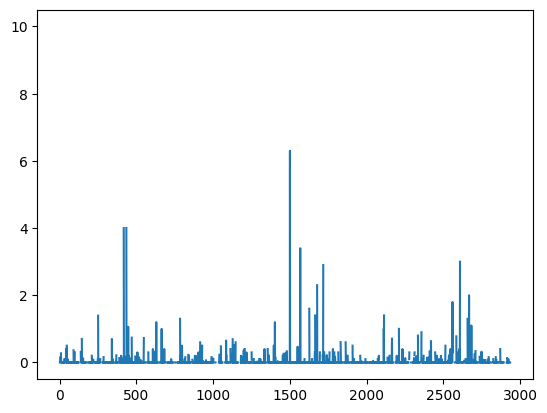

In [8]:
#Plot de l'erreur
plt.plot(dataset_train['Erreur'])

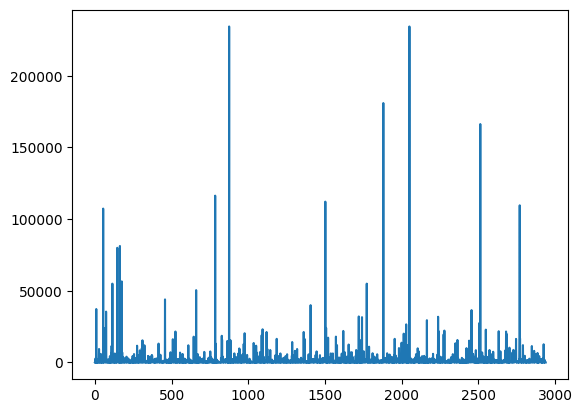

In [9]:
#plot de K
plt.plot(dataset_train['K'])

In [10]:
#pour les individus dont la valeur de Erreur manque, la valeur de logK exist, donc l'Erreur est proportionel dans ce cas à exp(logK)-K
Erreur = np.abs(np.exp(x_train.loc[x_train["logK"].isnull()==False,"logK"]) - x_train.loc[x_train["logK"].isnull()==False,"K"])/10
Erreur

0       0.003395
4       0.294857
5       0.252262
6       0.011902
7       1.565604
          ...   
2930    0.214163
2932    0.186315
2933    0.043997
2936    0.012646
2938    0.026011
Length: 1216, dtype: float64

In [11]:
x_train.loc[x_train["Erreur"].isnull()==True,"Erreur"] =Erreur

In [12]:
# x_train.loc[x_train["CID_Guest"].isnull()==True,"CID_Guest"] = -1

In [13]:
# x_test.loc[x_test["CID_Guest"].isnull()==True,"CID_Guest"] = -1

In [14]:
# x_train.loc[x_train["Erreur"].isnull()==True,"Erreur"] = 0

In [15]:
# x_test.loc[x_test["Erreur"].isnull()==True,"Erreur"] = 0

In [16]:
x_test.loc[x_test["Erreur"].isnull()==True,"Erreur"] =x_train["Erreur"].mean() ##verifier si l'approche marche ou nn 

In [17]:
y_train = x_train[['K']]
x_train = x_train.drop(['K','logK'],axis=1)

In [18]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# categorical_columns = ["Host"] 
# Onehot = ["Host"]
# label_encoder = ["IsomericSMILES"] 
# for col in label_encoder:
#     x_train[col] = LabelEncoder().fit_transform(x_train[col])
# # x_train["IsomericSMILES_Host"] = LabelEncoder().fit_transform(x_train["IsomericSMILES_Host"])
# remainder_cols = [col for col in x_train.columns if col not in categorical_columns]
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,handle_unknown="ignore"),Onehot)],remainder='passthrough')
# x_train = np.array(ct.fit_transform(x_train))

In [19]:
# for col in label_encoder:
#     x_test[col] = LabelEncoder().fit_transform(x_test[col])
# x_test = np.array(ct.transform(x_test))

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
categorical_columns = ["Host"] 
Onehot = ["Host"]
label_encoder = [] 
for col in label_encoder:
    x_train[col] = LabelEncoder().fit_transform(x_train[col])
remainder_cols = [col for col in x_train.columns if col not in categorical_columns]
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,handle_unknown="ignore"),Onehot)],remainder='passthrough')
x_train_array = ct.fit_transform(x_train)
encoded_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(categorical_columns)
all_feature_names = list(encoded_feature_names) + remainder_cols
x_train = pd.DataFrame(x_train_array, columns=all_feature_names)

In [21]:
x_test_array = ct.transform(x_test)
for col in label_encoder:
    x_test[col] = LabelEncoder().fit_transform(x_test[col])
encoded_feature_names_test = ct.named_transformers_['encoder'].get_feature_names_out(categorical_columns)
all_feature_names_test = list(encoded_feature_names_test) + remainder_cols
x_test = pd.DataFrame(x_test_array, columns=all_feature_names)

In [22]:
######## Nous appliquons paas StandardScaler dans ce cas puisque nous utilisons XGBRegressor, qui est basée sur Foret aléatoires et qui n'est pas sensible aux outliers.
#### Nous pouvons comparer les valeurs après...

In [23]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train[remainder_cols] = sc.fit_transform(x_train[remainder_cols])

In [24]:
# sc_test = StandardScaler()
# x_test[remainder_cols] = sc_test.fit_transform(x_test[remainder_cols])

In [25]:
# y_sc = StandardScaler()
# y_train = y_sc.fit_transform(y_train)

In [26]:
# from sklearn.ensemble import GradientBoostingRegressor
# reg = GradientBoostingRegressor(random_state=42,n_estimators=75,learning_rate=0.1,max_depth=6)
# reg.fit(x_train.values,y_train.values.ravel())

In [27]:
from xgboost import XGBRegressor
XG_reg = XGBRegressor(
    booster = 'gbtree',   
    # gamma = 0.01,
     learning_rate = 0.005,
     n_estimators=600,
     random_state=42,
     max_depth=6,
    # reg_lambda = 1.3,
    # reg_alpha=0.4
) 


In [28]:
# from sklearn.ensemble import RandomForestRegressor
# forest = RandomForestRegressor(n_estimators=40,random_state=42)

In [29]:
from sklearn.model_selection import cross_val_score

# K-fold cross validation
scores = cross_val_score(estimator=XG_reg, X=x_train.values, y=y_train, cv=5,scoring = 'neg_mean_absolute_error')  # 5-fold CV is relevant to get an idea of the model's performance
print(f"MAE Scores: {-scores}")
print(f"Mean MAE Score: {-scores.mean()} (+/- {scores.std()})")

MAE Scores: [1856.01002571 1748.96512506 1284.31594579 2190.51609569 1517.94254461]
Mean MAE Score: 1719.5499473735792 (+/- 307.0406811838251)


In [30]:
scores = cross_val_score(estimator=XG_reg, X=x_train.values, y=y_train, cv=5,scoring = 'neg_mean_squared_error') # 5-fold CV is relevant to get an idea of the model's performance
scores = np.sqrt(-scores)
print(f"RMSE Scores: {scores}")
print(f"Mean RMSE Score: {scores.mean()} (+/- {scores.std()})")

RMSE Scores: [ 7398.03430198  7858.32859119  3425.29842586 11003.35202945
  6162.12103109]
Mean RMSE Score: 7169.426875912841 (+/- 2460.0403219071436)


In [31]:
from sklearn.model_selection import cross_val_score

# K-fold cross validation
scores = cross_val_score(estimator=XG_reg, X=x_train.values, y=y_train, cv=5,scoring = 'r2')  # 5-fold CV is relevant to get an idea of the model's performance
print(f"CV Scores: {scores}")
print(f"Mean CV Score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

CV Scores: [0.14018965 0.51347363 0.6585505  0.25518119 0.50513446]
Mean CV Score: 0.415 (+/- 0.378)


In [32]:
# from sklearn.model_selection import GridSearchCV
# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],     # Test different learning rates
#     'n_estimators': [50, 100, 200,400],              # Number of boosting rounds
#     'max_depth': [3, 4, 5, 6],                   # Depth of trees
#     'subsample': [0.6, 0.8, 1.0],                # Fraction of samples used per tree
#     'colsample_bytree': [0.6, 0.8, 1.0],         # Fraction of features used per tree
#     'reg_alpha':[0, 0.1, 1],                    # L1 regularization
#     'reg_lambda': [1, 1.5, 2]                    # L2 regularization
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=XG_reg,
#     param_grid=param_grid,
#     cv=3,                     # 3-fold cross-validation
#     scoring='neg_mean_squared_error',  # Use appropriate scoring metric
#     verbose=2,                # Verbosity level for progress
#     n_jobs=-1                 # Use all available cores
# )

# # Fit the GridSearchCV object
# grid_search.fit(x_train.values, y_train)

# # Print best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best CV Score (MSE):", np.sqrt(-grid_search.best_score_))


In [33]:
XG_reg.fit(x_train.values,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
y_predict= XG_reg.predict(x_test.values)
# y_predict = y_sc.inverse_transform(y_predict_scaled)

In [35]:
# y_predict = reg.predict(x_test.values)
# y_predict = y_sc.inverse_transform(y_predict_scaled)

In [36]:
y_predict

array([8.57029114e+02, 4.99947632e+02, 7.56484619e+02, 3.30287292e+02,
       6.05031006e+02, 4.84553101e+02, 8.39750793e+02, 2.02606628e+03,
       8.02903870e+02, 2.56280249e+03, 6.17419495e+02, 5.56592712e+02,
       9.83604004e+02, 4.81761108e+02, 5.48896545e+02, 2.71478027e+02,
       2.52546484e+03, 8.90808533e+02, 2.57566986e+02, 3.53225220e+02,
       3.66219086e+02, 1.11563257e+03, 5.05168732e+02, 2.59898315e+02,
       4.10856598e+02, 3.03603271e+02, 4.24158789e+03, 3.79238647e+02,
       1.24058752e+03, 1.44179395e+04, 1.23803528e+03, 5.64413330e+02,
       1.34318530e+03, 7.19975098e+02, 3.29738330e+03, 3.83316681e+02,
       4.51473926e+03, 2.23643652e+04, 3.10306689e+03, 1.82228418e+03,
       1.80387439e+03, 5.54968750e+02, 7.13759705e+02, 1.84893997e+02,
       1.68333105e+03, 6.77814392e+02, 8.50160339e+02, 1.30721344e+02,
       2.13131042e+02, 1.46873184e+02, 1.03319910e+03, 4.62508392e+02,
       1.54849939e+03, 1.67266858e+03, 3.29499634e+02, 6.54313110e+02,
      

In [37]:
L = np.log(y_predict)

In [38]:
indiv_L_less_than = []
for i in range(len(L)):
    if(L[i]<5.3):
        indiv_L_less_than.append(i)
indiv_L_less_than = np.array(indiv_L_less_than)
indiv_L_greater_than = [i for i in range(len(L)) if i not in indiv_L_less_than]
indiv_L_greater_than = np.array(indiv_L_greater_than)

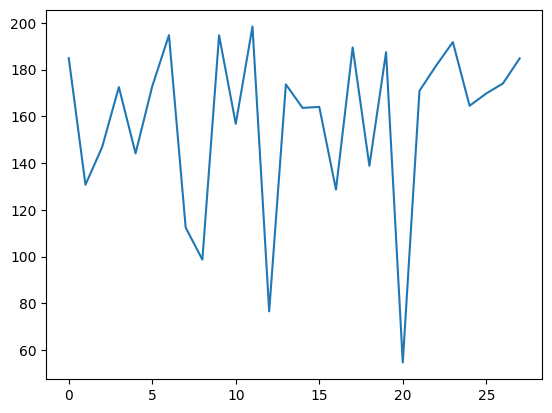

In [39]:
plt.plot(y_predict[indiv_L_less_than])

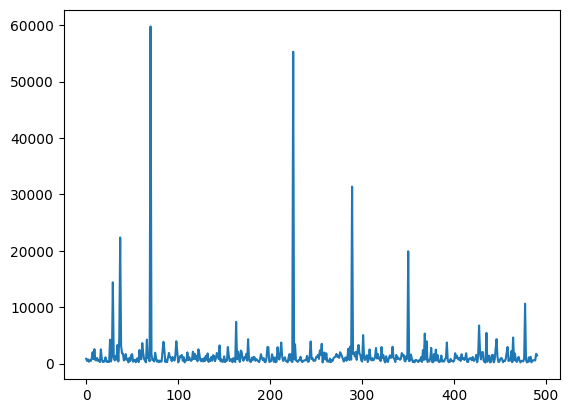

In [40]:
plt.plot(y_predict[indiv_L_greater_than])

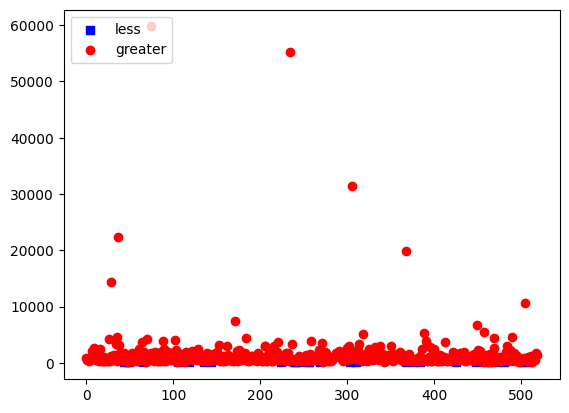

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(indiv_L_less_than,y_predict[indiv_L_less_than], c='b', marker="s", label='less')
ax1.scatter(indiv_L_greater_than,y_predict[indiv_L_greater_than], c='r', marker="o", label='greater')
plt.legend(loc='upper left')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[remainder_cols] = sc.fit_transform(x_train[remainder_cols])

In [43]:
sc_test = StandardScaler()
x_test[remainder_cols] = sc_test.fit_transform(x_test[remainder_cols])

In [44]:
y_sc = StandardScaler()
y_train = y_sc.fit_transform(y_train)

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(x_train)

In [46]:
principal_components

array([[ 8.32307320e-01, -6.82564929e+00,  4.09800608e+00, ...,
        -1.73472348e-16,  4.09394740e-15,  2.63677968e-16],
       [-4.74028450e-01,  3.60129022e+00,  2.59500707e+00, ...,
         2.24126273e-15,  2.06779038e-15, -2.01227923e-16],
       [-6.39175224e-01, -7.68401580e-02,  1.39008616e+00, ...,
         1.24900090e-15, -3.45556916e-15,  2.07472928e-15],
       ...,
       [ 9.74155061e-01,  3.98398123e+00,  3.10192010e+00, ...,
         1.39471767e-15, -1.20736754e-15, -1.38777878e-17],
       [-2.24039895e+00, -7.32115655e-01,  1.56099888e+00, ...,
         4.92661467e-16,  2.19269047e-15, -1.51267887e-15],
       [-2.15123751e+00, -9.69676337e-01, -2.42430012e+00, ...,
         8.32667268e-16, -4.24660307e-15, -6.80011603e-16]])

In [47]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(len(x_train.columns))], index=x_train.columns[0:])
print(loadings)

                                                         PC0       PC1  \
Host_2,6-Di-O-methyl-beta-cyclodextrin              0.001928  0.000960   
Host_Acetyl-beta-cyclodextrin, Monoacetyl-beta-...  0.000539 -0.003138   
Host_Hexakis (2,3,6-tri-O-methyl)-alpha-cyclode... -0.000480  0.000099   
Host_Hexakis[6-O-(2-hydroxypropyl)]-alpha-cyclo...  0.000211  0.000180   
Host_Hydroxypropyl gamma-cyclodextrin               0.005729 -0.000359   
Host_Succinyl-beta-cyclodextrin                     0.002144  0.000877   
Host_Trimethyl-beta-cyclodextrin                   -0.001215  0.000234   
Host_alpha-cyclodextrin                            -0.066020 -0.034526   
Host_beta-Cyclodextrin sulfate                      0.004006  0.000034   
Host_beta-cyclodextrin                             -0.024996  0.026668   
Host_carboxymethyl-beta-cyclodextrin                0.008606 -0.003143   
Host_gamma-cyclodextrin                             0.008812  0.018276   
Host_hp-beta-cd                       

In [48]:
# Set a threshold for which features to extract
threshold = 0.3

# Find features with loadings above the threshold for each principal component
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# Now 'important_features' dictionary contains the important features for each PC
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

PC0: 
PC1: Complexity, iso2vec-7, iso2vec-8
PC2: AromaticProportion, iso2vec-1, iso2vec-4, iso2vec-5, iso2vec-6
PC3: TPSA_Host, HBondDonorCount_Host
PC4: MolecularWeight, HeavyAtomCount, MolLogP
PC5: Complexity_Host, HBondDonorCount_Host, iso2vec-host-4
PC6: Charge, HBondDonorCount, iso2vec-9
PC7: Charge, iso2vec-3, iso2vec-8
PC8: iso2vec-host-0, iso2vec-host-6
PC9: T, Erreur
PC10: pH, T, Erreur
PC11: pH, T, Charge
PC12: T, Charge, iso2vec-9, iso2vec-host-6
PC13: Erreur
PC14: Charge, iso2vec-0, iso2vec-5, iso2vec-9
PC15: MolLogP, iso2vec-2, iso2vec-5
PC16: CID_Host, HBondDonorCount_Host, iso2vec-host-6
PC17: HBondDonorCount, HBondAcceptorCount
PC18: Host_alpha-cyclodextrin, Host_beta-cyclodextrin, Host_gamma-cyclodextrin
PC19: HBondDonorCount, AromaticProportion, iso2vec-1, iso2vec-2, iso2vec-5
PC20: iso2vec-host-0, iso2vec-host-5, iso2vec-host-6
PC21: Complexity, AromaticProportion
PC22: TPSA, MolLogP
PC23: CID_Host, iso2vec-host-2, iso2vec-host-4, iso2vec-host-7
PC24: HBondAcceptorCo

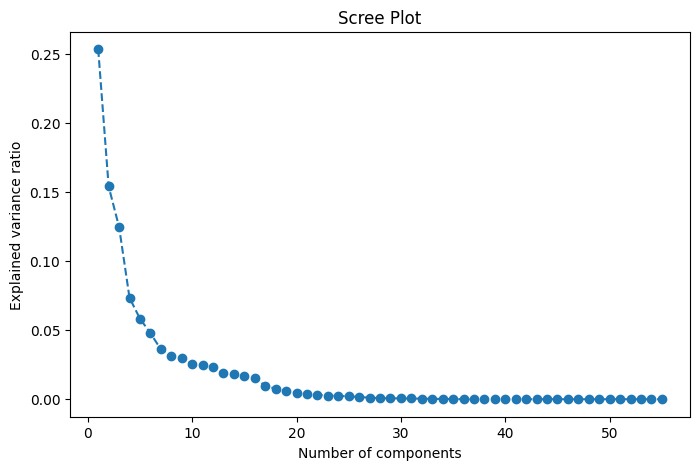

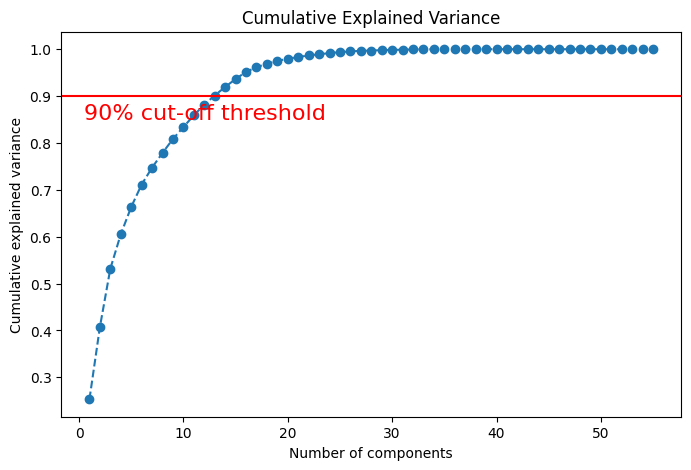

In [49]:

# Create a scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot for cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-')  # 90% variance line
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.show()

In [50]:
# Assuming pca is already fitted PCA object from sklearn
eigenvalues = pca.explained_variance_

# Applying Kaiser Criterion
kaiser_criterion = eigenvalues > 0.8

# Get the number of components that satisfy the Kaiser Criterion
n_components_kaiser = sum(kaiser_criterion)

# Print the components that satisfy the criterion
print(f"Number of components with eigenvalue > 1: {n_components_kaiser}")
important_components = np.arange(1, n_components_kaiser + 1)
print(f"Important components according to Kaiser Criterion: {important_components}")

# Optionally, if you want to see which specific components satisfy the criterion
for i, (ev, satisfy) in enumerate(zip(eigenvalues, kaiser_criterion), start=1):
    if satisfy:
        print(f"Component {i} with eigenvalue: {ev}")

Number of components with eigenvalue > 1: 12
Important components according to Kaiser Criterion: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Component 1 with eigenvalue: 10.05839637479481
Component 2 with eigenvalue: 6.115662872918733
Component 3 with eigenvalue: 4.947889948093307
Component 4 with eigenvalue: 2.913818270535809
Component 5 with eigenvalue: 2.3148147197401823
Component 6 with eigenvalue: 1.900102364578317
Component 7 with eigenvalue: 1.4348916514942789
Component 8 with eigenvalue: 1.2467595375795342
Component 9 with eigenvalue: 1.178430685152714
Component 10 with eigenvalue: 1.0131158917192962
Component 11 with eigenvalue: 0.9873560499876511
Component 12 with eigenvalue: 0.9214750468693377


In [51]:
# Convert the principal components to a DataFrame
principal_components_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(0, len(x_train.columns))])


# Display the head of the new DataFrame
principal_components_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
0,0.832307,-6.825649,4.098006,3.205096,1.523185,0.589122,-0.479683,0.391659,-2.004093,0.050864,...,3.122502e-16,3.552714e-15,-1.665335e-15,-1.665335e-16,6.661338e-16,5.892205e-15,-2.040035e-15,-1.734723e-16,4.093947e-15,2.636780e-16
1,-0.474028,3.601290,2.595007,0.149398,0.300848,0.326670,-0.619393,0.737438,-0.496299,-0.189249,...,2.029626e-15,1.387779e-16,-3.316791e-15,-8.049117e-16,1.221245e-15,8.449188e-15,-1.290634e-15,2.241263e-15,2.067790e-15,-2.012279e-16
2,-0.639175,-0.076840,1.390086,0.355721,-0.311632,0.446380,1.052913,-1.896215,-0.051133,-0.189724,...,-2.879641e-16,1.415534e-15,1.429412e-15,-7.494005e-16,-1.776357e-15,-3.215744e-16,1.845746e-15,1.249001e-15,-3.455569e-15,2.074729e-15
3,9.594953,-1.672083,-0.320119,-1.690939,-2.805248,0.440839,2.158821,-2.730082,1.089579,-1.155245,...,-2.362693e-15,1.071365e-14,8.049117e-16,5.551115e-17,1.026956e-15,2.626783e-14,1.956768e-15,-6.106227e-15,1.729172e-14,1.387779e-17
4,12.694729,2.947439,1.392628,7.798196,-3.575866,-1.965211,0.168818,2.697845,7.578109,-4.175114,...,4.249726e-14,-3.144707e-14,2.259304e-14,2.467471e-14,-4.024558e-15,5.817113e-14,3.914924e-14,7.235879e-14,-1.681988e-14,-3.412548e-14


In [52]:
L = []
S = list(important_features.values())
for i in range(1,13):
    for value in S[i]:
        L.append(value)
L

['Complexity',
 'iso2vec-7',
 'iso2vec-8',
 'AromaticProportion',
 'iso2vec-1',
 'iso2vec-4',
 'iso2vec-5',
 'iso2vec-6',
 'TPSA_Host',
 'HBondDonorCount_Host',
 'MolecularWeight',
 'HeavyAtomCount',
 'MolLogP',
 'Complexity_Host',
 'HBondDonorCount_Host',
 'iso2vec-host-4',
 'Charge',
 'HBondDonorCount',
 'iso2vec-9',
 'Charge',
 'iso2vec-3',
 'iso2vec-8',
 'iso2vec-host-0',
 'iso2vec-host-6',
 'T',
 'Erreur',
 'pH',
 'T',
 'Erreur',
 'pH',
 'T',
 'Charge',
 'T',
 'Charge',
 'iso2vec-9',
 'iso2vec-host-6']

In [53]:
len(L)

36

In [54]:
#lets try training only with variables in L

In [55]:
dataset_train = pd.read_csv('xtrainCyclodextrin.csv')
dataset_test = pd.read_csv('xtestCyclodextrin.csv')

In [56]:
x_train = dataset_train.drop(['Original_Value',"Reference","CID_Guest","Guest","IsomericSMILES_Host","IsomericSMILES"],axis=1)

In [57]:
x_test = dataset_test.drop(['Original_Value',"Reference","CID_Guest","Guest","IsomericSMILES_Host","IsomericSMILES"],axis=1)

In [58]:
#pour les individus dont la valeur de Erreur manque, la valeur de logK exist, donc l'Erreur est proportionel dans ce cas à exp(logK)-K
Erreur = np.abs(np.exp(x_train.loc[x_train["logK"].isnull()==False,"logK"]) - x_train.loc[x_train["logK"].isnull()==False,"K"])/10
Erreur

0       0.003395
4       0.294857
5       0.252262
6       0.011902
7       1.565604
          ...   
2930    0.214163
2932    0.186315
2933    0.043997
2936    0.012646
2938    0.026011
Length: 1216, dtype: float64

In [59]:
x_train.loc[x_train["Erreur"].isnull()==True,"Erreur"] =Erreur

In [60]:
x_test.loc[x_test["Erreur"].isnull()==True,"Erreur"] =x_train["Erreur"].mean() ##verifier si l'approche marche ou nn 

In [61]:
y_train = x_train[['K']]
x_train = x_train.drop(['K','logK'],axis=1)

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
categorical_columns = ["Host"] 
Onehot = ["Host"]
label_encoder = [] 
for col in label_encoder:
    x_train[col] = LabelEncoder().fit_transform(x_train[col])
remainder_cols = [col for col in x_train.columns if col not in categorical_columns]
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,handle_unknown="ignore"),Onehot)],remainder='passthrough')
x_train_array = ct.fit_transform(x_train)
encoded_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(categorical_columns)
all_feature_names = list(encoded_feature_names) + remainder_cols
x_train = pd.DataFrame(x_train_array, columns=all_feature_names)

In [63]:
x_test_array = ct.transform(x_test)
for col in label_encoder:
    x_test[col] = LabelEncoder().fit_transform(x_test[col])
encoded_feature_names_test = ct.named_transformers_['encoder'].get_feature_names_out(categorical_columns)
all_feature_names_test = list(encoded_feature_names_test) + remainder_cols
x_test = pd.DataFrame(x_test_array, columns=all_feature_names)

In [64]:
columns_to_drop = [col for col in x_train.columns if col not in L]

In [65]:
columns_to_drop

['Host_2,6-Di-O-methyl-beta-cyclodextrin',
 'Host_Acetyl-beta-cyclodextrin, Monoacetyl-beta-cyclodextrin',
 'Host_Hexakis (2,3,6-tri-O-methyl)-alpha-cyclodextrin',
 'Host_Hexakis[6-O-(2-hydroxypropyl)]-alpha-cyclodextrin',
 'Host_Hydroxypropyl gamma-cyclodextrin',
 'Host_Succinyl-beta-cyclodextrin',
 'Host_Trimethyl-beta-cyclodextrin',
 'Host_alpha-cyclodextrin',
 'Host_beta-Cyclodextrin sulfate',
 'Host_beta-cyclodextrin',
 'Host_carboxymethyl-beta-cyclodextrin',
 'Host_gamma-cyclodextrin',
 'Host_hp-beta-cd',
 'Host_methyl beta-cyclodextrin',
 'Host_sulfobutylether-beta-cd',
 'CID_Host',
 'TPSA',
 'HBondAcceptorCount',
 'MolecularWeight_Host',
 'Charge_Host',
 'HBondAcceptorCount_Host',
 'HeavyAtomCount_Host',
 'iso2vec-0',
 'iso2vec-2',
 'iso2vec-host-1',
 'iso2vec-host-2',
 'iso2vec-host-3',
 'iso2vec-host-5',
 'iso2vec-host-7',
 'iso2vec-host-8',
 'iso2vec-host-9']

In [66]:
x_train = x_train.drop(columns_to_drop,axis=1)

In [67]:
x_test = x_test.drop(columns_to_drop,axis=1)

In [68]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train[remainder_cols] = sc.fit_transform(x_train[remainder_cols])

In [69]:
# sc_test = StandardScaler()
# x_test[remainder_cols] = sc_test.fit_transform(x_test[remainder_cols])

In [70]:
# y_sc = StandardScaler()
# y_train = y_sc.fit_transform(y_train)

In [71]:
from xgboost import XGBRegressor
XG_reg = XGBRegressor(
    booster = 'gbtree',   
    # gamma = 0.01,
     learning_rate = 0.005,
     n_estimators=600,
     random_state=42,
     max_depth=6,
    # reg_lambda = 1.3,
    # reg_alpha=0.4
) 


In [72]:
from sklearn.model_selection import cross_val_score

# K-fold cross validation
scores = cross_val_score(estimator=XG_reg, X=x_train.values, y=y_train, cv=5,scoring = 'neg_mean_absolute_error')  # 5-fold CV is relevant to get an idea of the model's performance
print(f"MAE Scores: {-scores}")
print(f"Mean MAE Score: {-scores.mean()} (+/- {scores.std()})")

MAE Scores: [1843.55531366 1825.77357424 1370.25859713 2138.75142595 1639.60003229]
Mean MAE Score: 1763.5877886514681 (+/- 253.41288379619067)


In [73]:
scores = cross_val_score(estimator=XG_reg, X=x_train.values, y=y_train, cv=5,scoring = 'neg_mean_squared_error') # 5-fold CV is relevant to get an idea of the model's performance
scores = np.sqrt(-scores)
print(f"RMSE Scores: {scores}")
print(f"Mean RMSE Score: {scores.mean()} (+/- {scores.std()})")

RMSE Scores: [ 7750.17118633  8231.90433684  4635.83956431 10847.85923977
  6862.21818799]
Mean RMSE Score: 7665.59850304754 (+/- 2013.9263834689107)


In [74]:
from sklearn.model_selection import cross_val_score

# K-fold cross validation
scores = cross_val_score(estimator=XG_reg, X=x_train.values, y=y_train, cv=5,scoring = 'r2')  # 5-fold CV is relevant to get an idea of the model's performance
print(f"CV Scores: {scores}")
print(f"Mean CV Score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

CV Scores: [0.05638999 0.46611631 0.37455881 0.27608311 0.38630044]
Mean CV Score: 0.312 (+/- 0.283)


In [75]:
XG_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [76]:
y_predict_pca= XG_reg.predict(x_test)
# y_predict = y_sc.inverse_transform(y_predict_scaled)

In [77]:
y_predict_pca

array([  764.6014  ,   673.679   ,   773.6158  ,   619.241   ,
         780.21423 ,   464.75302 ,   852.3729  ,  1292.7231  ,
         899.08307 ,   174.62512 ,   651.7394  ,   459.0415  ,
         903.48456 ,   507.28107 ,   480.98877 ,   288.7768  ,
        2364.9443  ,   658.84314 ,   281.52615 ,   227.90811 ,
         438.68607 ,  1160.0162  ,   542.46826 ,   296.7637  ,
         502.45886 ,   209.50471 ,  7848.064   ,   931.8318  ,
        1242.4938  ,  9067.465   ,  1807.7831  ,   718.7741  ,
        1257.317   ,  1003.7471  ,  9903.814   ,   525.10376 ,
        5411.791   , 22843.14    ,  2491.4504  ,  2143.7178  ,
        2004.5504  ,   652.74335 ,   922.94855 ,   263.90106 ,
         945.835   ,   872.6565  ,  1058.9008  ,   184.213   ,
         240.80147 ,   167.58159 ,   966.3477  ,   596.6727  ,
        1920.6324  ,  2002.8949  ,   328.79214 ,   573.0347  ,
         572.99927 ,   243.29639 ,  1444.603   ,   576.5896  ,
         429.56235 ,  2700.6262  ,   741.9739  ,   840.

In [78]:
y_diff = y_predict-y_predict_pca

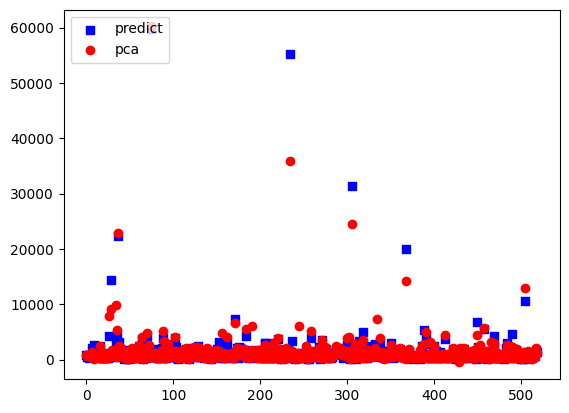

In [79]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = range(len(y_predict))
ax1.scatter(x,y_predict, c='b', marker="s", label='predict')
ax1.scatter(x,y_predict_pca, c='r', marker="o", label='pca')
plt.legend(loc='upper left')
plt.show()

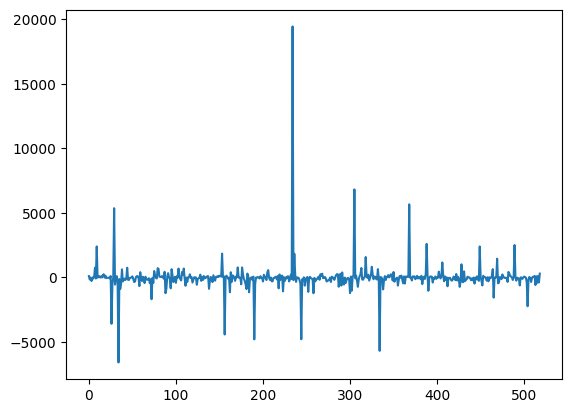

In [80]:
plt.plot(x,y_diff)